Predicting average vote per movie by reviews.

In [86]:
#Importing needed modules.
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback
#Instancing from 'Tokenizer' object.
tokenizer = Tokenizer(oov_token='<00U00>')

In [87]:
#Reading csv file and getting 10 sample of that randomly.
path = "D:\\datasets\\Englis_movies\\english_movies.csv"
file = read_csv(path)
df = file.copy()
df.sample(10)

,title,overview,release_date,genres,popularity,vote_average,vote_count
1703,House of Gucci,"When Patrizia Reggiani, an outsider from humbl...",2021-11-24,"Drama, Crime, History",32.792,6.6,2687
9886,There's a Girl in My Soup,"TV personality Robert Danvers, an exceedingly ...",1970-12-15,"Comedy, Romance",7.948,5.6,42
9395,Pirates,Captain Red runs a hardy pirate ship with the ...,1986-05-08,"Adventure, Comedy",9.530,6.2,223
1198,Batman Returns,While Batman deals with a deformed man calling...,1992-06-19,"Action, Fantasy",40.960,6.9,5866
3459,Punisher: War Zone,Waging his one-man war on the world of organiz...,2008-12-05,"Action, Crime",20.856,5.8,1015
8588,Play Misty for Me,A brief fling between a male disc jockey and a...,1971-10-01,"Drama, Thriller",10.979,6.6,419
2665,The Hip Hop Nutcracker,Features Rev Run as he brings audiences on a h...,2022-11-25,"Music, Comedy, Family",24.651,5.4,18
6123,Sorcerer,"Four men from different parts of the globe, al...",1977-06-24,"Adventure, Thriller",14.522,7.4,402
8388,Zoo,Young Tom and his misfit friends fight to save...,2018-06-08,"Family, War, History",11.262,6.7,93
992,The Thing,A team of American scientists investigate the ...,1982-06-25,"Horror, Mystery, Science Fiction",45.805,8.0,6104


In [88]:
#Droping null samples.
df = df.dropna()
#Getting information from data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9959 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9959 non-null   object 
 1   overview      9959 non-null   object 
 2   release_date  9959 non-null   object 
 3   genres        9959 non-null   object 
 4   popularity    9959 non-null   float64
 5   vote_average  9959 non-null   float64
 6   vote_count    9959 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 622.4+ KB


In [89]:
df.vote_average.describe()

count    9959.000000
mean        6.306697
std         1.167903
min         0.000000
25%         5.900000
50%         6.400000
75%         7.000000
max        10.000000
Name: vote_average, dtype: float64

In [90]:
#Creating a function to remove stop words from each text.
def filter(text)->None:
    '''function doctrsing'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    val = [letter for letter in text.lower().split() if letter not in stopwords]
    return ' '.join(val)

In [91]:
#Seperating labels and features.
X = [filter(note) for note in df.overview]
Y = df.vote_average.to_numpy()

In [92]:
X[:2]

["attempt save family inadvertently alters future, barry allen becomes trapped reality general zod returned no super heroes turn to. order save world return future knows, barry's hope race life. will making ultimate sacrifice enough reset universe?",
 'barbie ken time lives colorful seemingly perfect world barbie land. however, get chance go real world, soon discover joys perils living among humans.']

In [93]:
#Tokenizing reviews and creating a matrix from them.
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
matrix = pad_sequences(sequences,padding='post',truncating='post',maxlen=16)

In [94]:
matrix[:2]

array([[  256,    36,     8,  1513,  9549,   121,  3824,  3825,    34,
          293,   433,   854, 11881,  1601,    63,   434],
       [  936,  3600,    17,    42,  3187,   532,   305,     6,   936,
          248,    87,    28,   199,    75,   138,     6]])

In [95]:
#Seperating features and labels to train and valid.
xtr , xts , ytr , yts = train_test_split(matrix,Y,test_size=0.2,random_state=42)

In [96]:
message = f'Train datas are : {len(xtr)}\nTest datas are :{len(xts)}'
print(message)

Train datas are : 7967
Test datas are :1992


In [97]:
#Defining a model by a function.
def Model(optm,Loss,metric)->None:
    '''function docstring'''
    model = models.Sequential([layers.Flatten(),
                               layers.Dense(4,activation='relu'),
                              layers.Dense(1,activation='linear')])
    model.compile(optimizer=optm,
                 loss=Loss,
                 metrics=[metric])
    return model

In [98]:
#Creating a class for calling callback.
class Stop(Callback) :
    def on_epoch_end(self,epoch,logs=dict()) :
        if (logs.get('val_loss')<2):
            print('Validation mean squared error is lower than 2 , so stop train.')
            self.model.stop_training = True
call = Stop()

In [99]:
#datas train.
history = Model('rmsprop','mse','mae').fit(xtr,ytr,epochs=200,validation_data = (xts,yts),callbacks=call)

Epoch 1/200
249/249 [==============================] - 39s 1ms/step - loss: 12024935.0000 - mae: 2135.3228 - val_loss: 2758284.2500 - val_mae: 999.8787
Epoch 2/200
249/249 [==============================] - 0s 1ms/step - loss: 1065349.3750 - mae: 498.3634 - val_loss: 149578.0156 - val_mae: 159.0662
Epoch 3/200
249/249 [==============================] - 0s 958us/step - loss: 59264.0273 - mae: 74.6726 - val_loss: 7247.0073 - val_mae: 19.3483
Epoch 4/200
249/249 [==============================] - 0s 946us/step - loss: 4606.4946 - mae: 12.2308 - val_loss: 514.1098 - val_mae: 6.5381
Epoch 5/200
249/249 [==============================] - 0s 1ms/step - loss: 1338.3447 - mae: 6.8242 - val_loss: 184.1067 - val_mae: 6.9685
Epoch 6/200
249/249 [==============================] - 0s 1ms/step - loss: 557.4431 - mae: 5.6595 - val_loss: 63.3303 - val_mae: 5.0398
Epoch 7/200
249/249 [==============================] - 0s 1ms/step - loss: 247.1900 - mae: 4.7665 - val_loss: 20.9962 - val_mae: 3.7530
Epoch

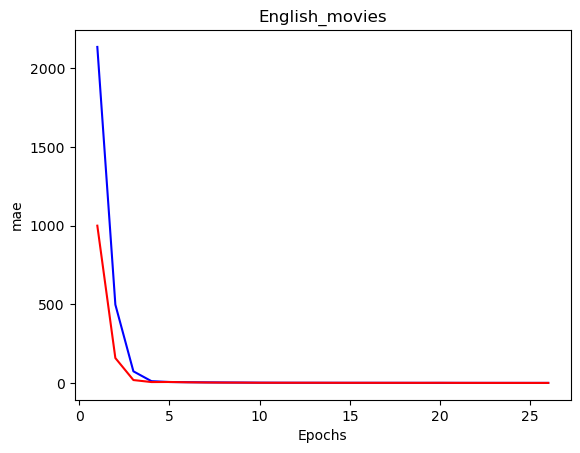

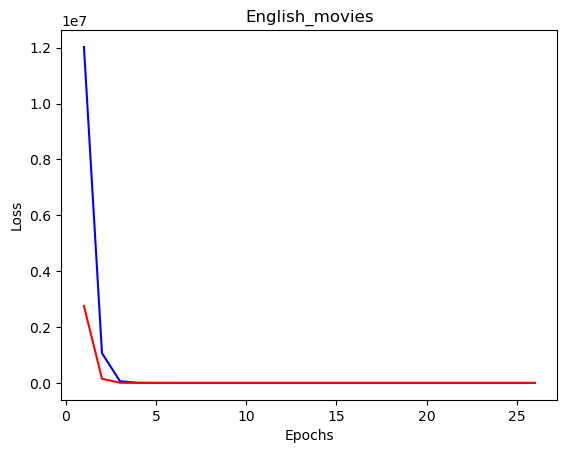

In [100]:
#Visualize models performance
epoch = range(1,len(history.epoch)+1)
results = history.history
plt.plot(epoch,results['mae'],'blue')
plt.plot(epoch,results['val_mae'],'red')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.title('English_movies')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('English_movies')
plt.show()